In [31]:
import pandas as pd
import polars as pl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from pathlib import Path


# 149. SVM with Scikit-Learn and Python - Classification Part One

In [32]:
df = pd.read_csv(r'F:\DataSpell\data_science_ml_learning\DATA\mouse_viral_study.csv')

In [33]:
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


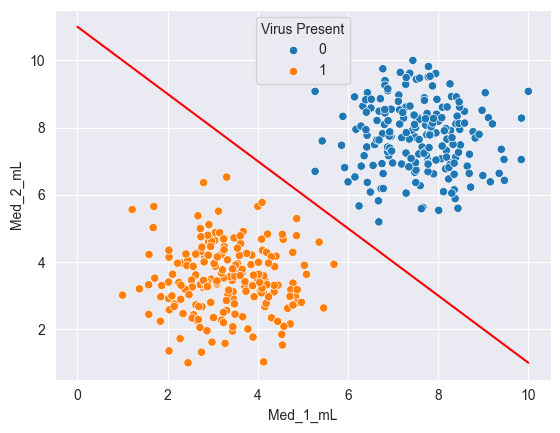

In [34]:
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present')

# HYPERPLANE

x = np.linspace(0, 10, 100)

m = -1
b = 11
y = m*x + b

plt.plot(x, y, 'r')

In [35]:
from sklearn.svm import SVC

In [36]:
y = df['Virus Present']

In [37]:
X = df.drop('Virus Present', axis=1)

In [38]:
model = SVC(kernel='linear', C=1_000)

In [39]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [40]:
from svm_margin_plot import plot_svm_boundary

F:\DataSpell\data_science_ml_learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


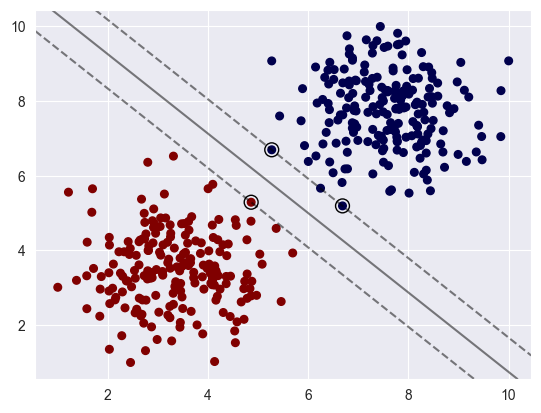

In [41]:
plot_svm_boundary(model, X, y)

In [42]:
X

,Med_1_mL,Med_2_mL
0,6.508231,8.582531
1,4.126116,3.073459
2,6.427870,6.369758
3,3.672953,4.905215
4,1.580321,2.440562
...,...,...
395,2.884122,3.271748
396,7.290855,9.488672
397,7.895325,8.272529
398,2.690592,2.674979


# 150. SVM with Scikit-Learn and Python - Classification Part Two

In [49]:
model = SVC(kernel='linear', C=0.05)

In [50]:
model.fit(X, y)

SVC(C=0.05, kernel='linear')

F:\DataSpell\data_science_ml_learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


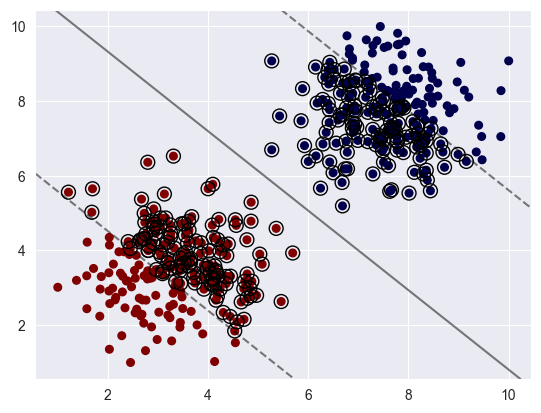

In [48]:
plot_svm_boundary(model, X, y)

In [67]:
model = SVC(kernel='rbf', C=1, gamma=2) 
# default is rbf
# gamma how much influence a single training example has
# gamma is larger the influence is smaller
# when gamma is to large the model is overfitting

In [68]:
model.fit(X, y)

SVC(C=1, gamma=0.9)

F:\DataSpell\data_science_ml_learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


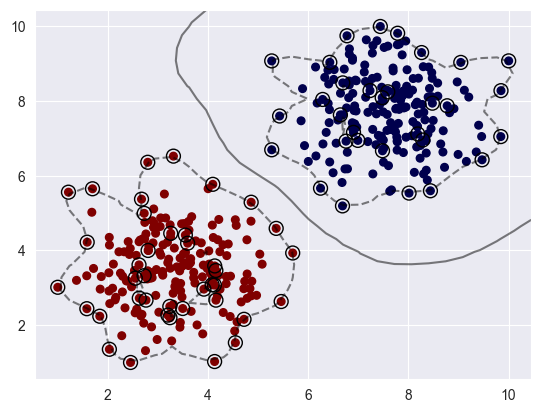

In [69]:
plot_svm_boundary(model, X, y)

In [70]:
model = SVC(kernel='sigmoid')

In [71]:
model.fit(X, y)

SVC(kernel='sigmoid')

F:\DataSpell\data_science_ml_learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


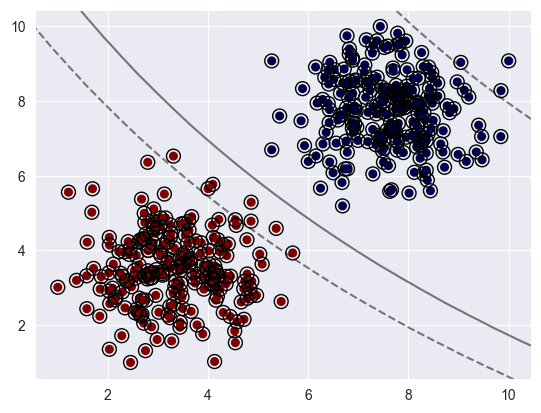

In [72]:
plot_svm_boundary(model, X, y)

F:\DataSpell\data_science_ml_learning\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


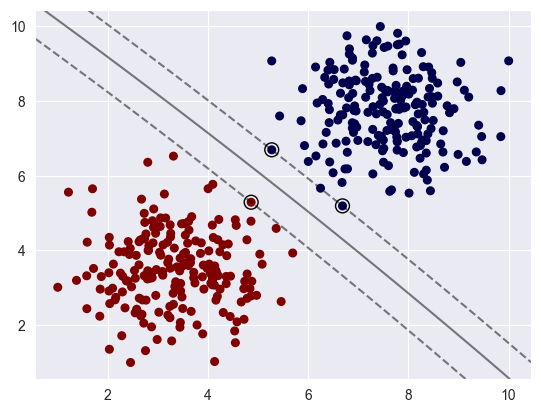

In [73]:
model = SVC(kernel='poly', degree=2)
model.fit(X, y)
plot_svm_boundary(model, X, y)

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [75]:
svm = SVC()

In [76]:
param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}

In [77]:
grid = GridSearchCV(svm, param_grid)

In [78]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [79]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}